In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('SSR.csv')
data.head()

,H,Q,D,SSR,Sqz_label
0,150.0,0.400,6.0,0.627,N
1,200.0,0.400,6.0,0.335,N
2,52.0,15.000,13.0,2.721,N
3,280.0,0.050,3.0,0.100,Y
4,100.0,0.005,4.2,0.011,Y


In [3]:
X = data.drop(['Sqz_label'], axis=1)
y = data.Sqz_label

In [23]:
#label encoding the categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = np.reshape(y, (-1,1))

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, 
                                                    random_state = 42)


In [26]:
#importing Gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [47]:
#gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

In [70]:
#pipeline for model
def pipe_line(scaler, model):
    pipe = Pipeline([('Scaler', scaler), ('GNB', model)])
    pipe.fit(X_train, y_train)
    print(pipe.score(X_test, y_test))
    return pipe

#result summary for the prediction
def result(pipe):
    pipe.fit(X_train, y_train)
    print(pipe.score(X_test, y_test))



In [72]:
stsc = StandardScaler()
pipe_gnb = pipe_line(stsc, gnb)
pipe_gbc = pipe_line(stsc, gb_clf)


0.7241379310344828
0.8620689655172413


C:\Users\User\.conda\envs\tensor flow\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\.conda\envs\tensor flow\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
y_pred1 =(pipe_line(stsc, gnb)).predict(X_test)
y_pred2 = (pipe_line(stsc, gb_clf)).predict(X_test)

0.7241379310344828
0.8620689655172413


C:\Users\User\.conda\envs\tensor flow\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\.conda\envs\tensor flow\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
pipe_gbc = pipe_line(StandardScaler(), gb_clf)

In [51]:
pipe_line(stsc, pipe_gbc)

Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('GNB',
                 Pipeline(memory=None,
                          steps=[('Scaler',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True)),
                                 ('GNB',
                                  GradientBoostingClassifier(ccp_alpha=0.0,
                                                             criterion='friedman_mse',
                                                             init=None,
                                                             learning_rate=0.1,
                                                             loss='deviance',
                                                             max_depth=3,
                                                             max_features=None,
                                      

In [60]:
print("Bayes model result ".format(result(pipe_gnb)))
print("Gradient model result ".format(result(pipe_gbc)))

0.7241379310344828
Bayes model result 
0.8620689655172413
Gradient model result 


C:\Users\User\.conda\envs\tensor flow\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\.conda\envs\tensor flow\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred1)

array([[ 5,  8],
       [ 0, 16]], dtype=int64)

In [42]:
def figure(y_pred):
    plt.plot(y_test, marker = 'o', color = 'g', label = 'y_test')
    plt.plot(y_pred, marker = '^', color = 'r', label = 'y_pred')
    plt.grid()
    plt.xlabel('No Of Observation')
    plt.ylabel('Label')
    plt.legend()
    plt.title('Rock Classification')

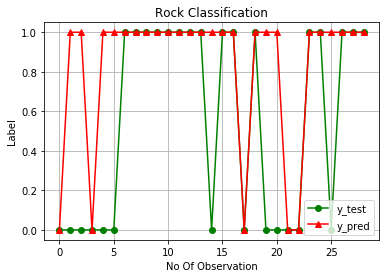

In [77]:
figure(y_pred1)

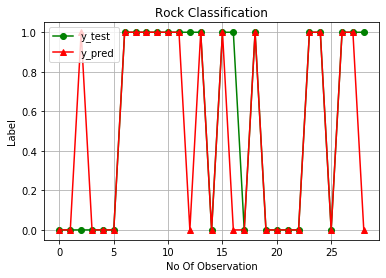

In [79]:
figure(y_pred2)